In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns


In [19]:
ds = pd.read_csv('50_Startups.csv', header=0)
if ds.iloc[:,3].dtype=='object':
    le = LabelEncoder()
    ds.iloc[:,3] = le.fit_transform(ds.iloc[:,3])
x = ds.iloc[:,:-1]
y = ds.iloc[:,-1]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=1)
ytrain.head()

32     97427.84
39     81005.76
21    111313.02
36     90708.19
19    122776.86
Name: Profit, dtype: float64

In [23]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [39]:
from sklearn.metrics import r2_score, mean_squared_error as mse
ypred = lr.predict(xtest)

In [41]:
ms = mse(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f" the mean squared error is : {ms:.2f}")
print(f" the r2 score is : {r2:.4f}")

 the mean squared error is : 79447889.48
 the r2 score is : 0.9650


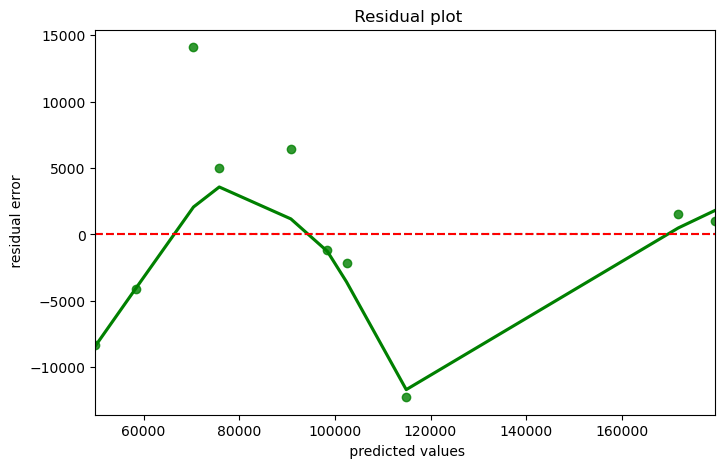

In [53]:
plt.figure(figsize=(8,5))
sns.residplot(x = ypred, y= (ytest-ypred), lowess= True , color= 'green')
plt.axhline(y=0, color = 'red', linestyle= '--')
plt.xlabel(' predicted values')
plt.ylabel(' residual error')
plt.title(' Residual plot')
plt.show()

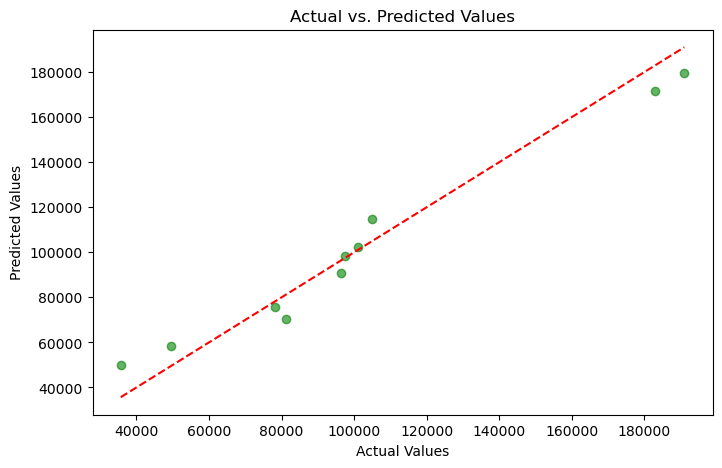

In [55]:

# 2️⃣ Actual vs. Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(ytest, ypred, color='green', alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle="--", color="red")  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()